# Asignatura: INTELIGENCIA ARTIFICIAL APLICADA A INTERNET DE LAS COSAS
#### Práctica 0 : Python
#### Integrantes del grupo 1: Pablo Cayo Alcalde Montes de Oca, Alejandro de Celis Domínguez, Diego Pellicer Lafuente

<br>

En esta memoria incluímos el desarrollo realizado para dar respuesta al problema explicado en el siguiente enunciado.

## 1. Enunciado

<b> En esta primera práctica has de implementar un algoritmo de integración numérica basado en el método de Monte Carlo.

<b> Dada una función real e integrable de una sola variable f(x), y su integral F(x), la integral definida de f(x) entre a y b viene dada por la expresión

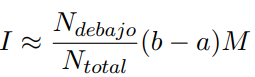

<b> como el cálculo simbólico de la integral F(x) puede ser muy difícil, se utilizan métodos numéricos que aproximan su valor utilizando la interpretación geométrica de la integral definida que se corresponde con el área bajo la curva f(x) entre a y b.

<b> Dada una función f(x) positiva en el intervalo x 2 [a; b] cuyo valor máximo es M dentro de ese intervalo, podemos definir un rectángulo de área (b  a) ⇥ M como el que se muestra en la figura para el intervalo [0; 2]. El método de Monte Carlo para el cálculo de la integral consiste en generar aleatoriamente puntos (en rojo en la figura) dentro de ese rectángulo y aproximar el valor de la integral por el porcentaje de puntos que caen por debajo de la función en cuestión:

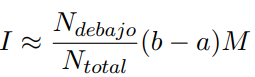

<b> donde Ndebajo es el número de puntos (x, y) generados aleatoriamente cuya coordenada y es menor que el valor de la función f(x) para ese valor de x y Ntotal es el número total de puntos generados aleatoriamente dentro del rectángulo.

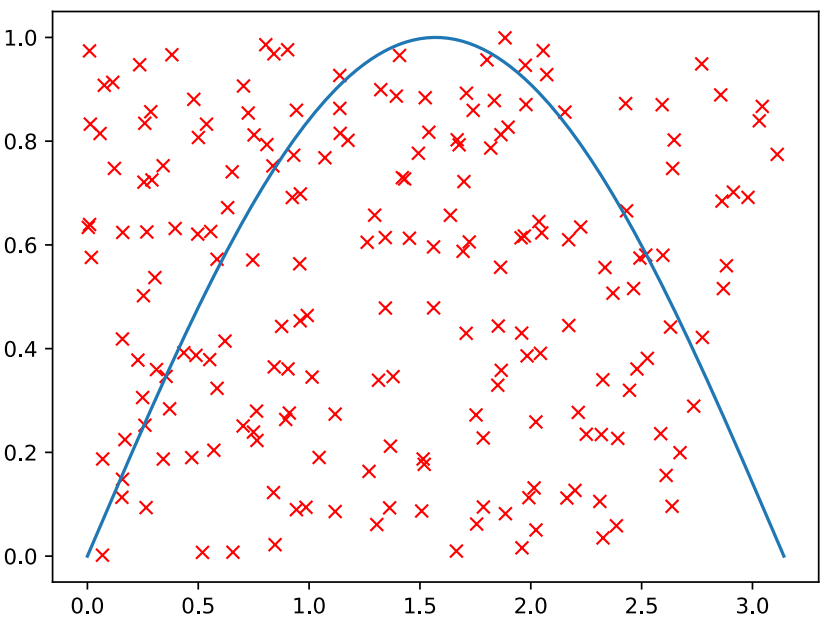

<br>

<b> Implementa en Python una función con la siguiente cabecera 

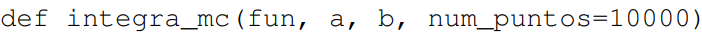

<b> que calcule la integral de fun entre a y b por el método de Monte Carlo antes descrito, generando para ello num_puntos aleatoriamente. Puedes comprobar la corrección del resultado obtenido, comparándolo con el de aplicar la función scipy.integrate.quad de Python.

<b> Debes implementar dos versiones del algoritmo, una iterativa que realice num_puntos iteraciones para calcular el resultado, y otra que utilice operaciones entre vectores en lugar de bucles, comparando los tiempos de ejecución obtenidos con ambas versiones. </b>


------------------------------------------------------

## 2. Desarrollo de la práctrica 
Siguiendo las indicaciones del guión de prácticas, se han desarrollado dos versiones de la función integrac_mc.

En nuestro código, la función "integra_mc" se corresponde con la versión de operaciones entre bucles, mientras que la versión "np_integra_mc" es la que implementa las operaciones entre vectores.

In [9]:
from random import uniform
import numpy as np
##import monte_carlo
from typing import Callable

def integra_mc(fun: Callable[[float],float], a: float, b :float, num_puntos=10000) -> float:
    ys = [fun(uniform(a,b)) for i in range(num_puntos)]
    ymax = max(ys)
    count = sum(uniform(0,ymax) < y for y in ys)
    area = (b - a) * ymax * count / num_puntos
    return area

def np_integra_mc(fun: Callable[[float],float], a: float, b :float, num_puntos=10000) -> float:
    xs = np.random.uniform(a, b, num_puntos)
    try:
        ys = fun(xs)
    except:
        vfun = np.vectorize(fun)
        ys = vfun(xs)
    ymax = np.max(ys)
    count = (ys > np.random.uniform(0, ymax)).sum()
    area = (b - a) * ymax * count / num_puntos
    return area

Comenzamos con la ejecución de la versión de operaciones entre bucles. Como parámetros utilizaos los siguientes:
- Función: utilizamos una integral de un polinomio de grado 2. ![alt text](image.png)
- cotas a y b: utilizamos a = 0 y b = 1.
- Número de puntos a generar aleatoriaente: los indicados en el guión de la práctica: 1 000 000.

In [6]:
integra_mc(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1, 1000000)

0.8344792793373719

Vemos que el tiempo de ejecución es de 0.6 segundos.

In [7]:
np_integra_mc(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1, 1000000)

1.74937640173051

Vemos que el tiempo de ejecución es de 0.3 segundos, 0.4 segundos más rápido que la versión de operarciones entre bucles ("integra_mc"). ***TO DO: AÑADIR EXPLICACION AQUI***

El resultado obtenido difiere con el de la versión anterior (integra_mc = 0.8325294154795766 vs np_integra_mc = 1.0003858762206228 ).

A continuación, procedemos a comparar nuestros resultados con los obtenidos con la función scipy.integrate.quad.

In [12]:
from scipy import integrate ##se importa la libreria de scipy para utilizar la función quad
integrate.quad(lambda x: x **2 + 1 if x > .5 else x**2, 0, 1)

(0.8333333333333334, 9.2148511043888e-15)

Podemos ver que, utilizando la funcio quad y su resultado como referencia, la función que hemos desarrollado y que más se aproxima a este resultado es "integra_mc" (operaciones entre bucles), peese a ser la menos óptima en tiempo de ejeución.

***TODO_REPRESENTACIONES GRAFICAS